In [73]:
import numpy as np  
import pandas as pd 
import pickle # Python object serialization library. Not secure
from sklearn.decomposition import PCA
import math                                # Library for math functions
import random
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

word_embeddings = pickle.load( open( "word_embeddings_subset.p", "rb" ) )
len(word_embeddings) # there should be 243 words that will be used in this assignment
import matplotlib.pyplot as plt # Import matplotlib
%matplotlib inline

In [ ]:
#Linear algebra

In [2]:
alist = [1, 2, 3, 4, 5]   # Define a python list. It looks like an np array
narray = np.array([1, 2, 3, 4])

In [3]:
print(alist)
print(narray)

print(type(alist))
print(type(narray))

[1, 2, 3, 4, 5]
[1 2 3 4]
<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
#Algebraic operators on NumPy arrays vs. Python lists¶

In [4]:
print(narray + narray)
print(alist + alist)

[2 4 6 8]
[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


In [5]:
print(narray * 3)
print(alist * 3)

[ 3  6  9 12]
[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


In [ ]:
#Matrix or Array of Arrays

In [6]:
npmatrix1 = np.array([narray, narray, narray]) # Matrix initialized with NumPy arrays
npmatrix2 = np.array([alist, alist, alist]) # Matrix initialized with lists
npmatrix3 = np.array([narray, [1, 1, 1, 1], narray]) # Matrix initialized with both types

print(npmatrix1)
print(npmatrix2)
print(npmatrix3)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]
[[1 2 3 4]
 [1 1 1 1]
 [1 2 3 4]]


In [ ]:
# when defining a matrix, be sure that all the rows contain the same number of elements

In [7]:
# Example 1:

okmatrix = np.array([[1, 2], [3, 4]]) # Define a 2x2 matrix
print(okmatrix) # Print okmatrix
print(okmatrix * 2) # Print a scaled version of okmatrix

[[1 2]
 [3 4]]
[[2 4]
 [6 8]]


In [8]:
# Example 2:

badmatrix = np.array([[1, 2], [3, 4], [5, 6, 7]]) # Define a matrix. Note the third row contains 3 elements
print(badmatrix) # Print the malformed matrix
print(badmatrix * 2) # It is supposed to scale the whole matrix

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [9]:
# Scale by 2 and translate 1 unit the matrix
result = okmatrix * 2 + 1 # For each element in the matrix, multiply by 2 and add 1
print(result)

[[3 5]
 [7 9]]


In [10]:
# Add two compatible matrices
result1 = okmatrix + okmatrix
print(result1)

# Subtract two compatible matrices. This is called the difference vector
result2 = okmatrix - okmatrix
print(result2)

[[2 4]
 [6 8]]
[[0 0]
 [0 0]]


In [11]:
result = okmatrix * okmatrix # Multiply each element by itself
print(result)

[[ 1  4]
 [ 9 16]]


In [12]:
#Transpose a matrix
matrix3x2 = np.array([[1, 2], [3, 4], [5, 6]]) # Define a 3x2 matrix
print('Original matrix 3 x 2')
print(matrix3x2)
print('Transposed matrix 2 x 3')
print(matrix3x2.T)

Original matrix 3 x 2
[[1 2]
 [3 4]
 [5 6]]
Transposed matrix 2 x 3
[[1 3 5]
 [2 4 6]]


In [15]:
#does not affect 1D arrays.
nparray = np.array([1, 2, 3, 4]) # Define an array
print('Original array')
print(nparray)
print('Transposed array')
print(nparray.T)

Original array
[1 2 3 4]
Transposed array
[1 2 3 4]


In [14]:
nparray = np.array([[1, 2, 3, 4]]) # Define a 1 x 4 matrix. Note the 2 level of square brackets
print('Original array')
print(nparray)
print('Transposed array')
print(nparray.T)

Original array
[[1 2 3 4]]
Transposed array
[[1]
 [2]
 [3]
 [4]]


In [16]:
#Get the norm of a nparray or matrix
nparray1 = np.array([1, 2, 3, 4]) # Define an array
norm1 = np.linalg.norm(nparray1)

nparray2 = np.array([[1, 2], [3, 4]]) # Define a 2 x 2 matrix. Note the 2 level of square brackets
norm2 = np.linalg.norm(nparray2) 

print(norm1)
print(norm2)

5.477225575051661
5.477225575051661


In [17]:
nparray2 = np.array([[1, 1], [2, 2], [3, 3]]) # Define a 3 x 2 matrix. 

normByCols = np.linalg.norm(nparray2, axis=0) # Get the norm for each column. Returns 2 elements
normByRows = np.linalg.norm(nparray2, axis=1) # get the norm for each row. Returns 3 elements

print(normByCols)
print(normByRows)


[3.74165739 3.74165739]
[1.41421356 2.82842712 4.24264069]


In [19]:
#dot product between arrays:
nparray1 = np.array([0, 1, 2, 3]) # Define an array
nparray2 = np.array([4, 5, 6, 7]) # Define an array

flavor1 = np.dot(nparray1, nparray2) # Recommended way
print(flavor1)


38


In [20]:
norm1 = np.dot(np.array([1, 2]), np.array([3, 4])) # Dot product on nparrays
norm2 = np.dot([1, 2], [3, 4]) # Dot product on python lists

print(norm1, '=', norm2 )

11 = 11


In [21]:
#Sums by rows or columns
nparray2 = np.array([[1, -1], [2, -2], [3, -3]]) # Define a 3 x 2 matrix. 

sumByCols = np.sum(nparray2, axis=0) # Get the sum for each column. Returns 2 elements
sumByRows = np.sum(nparray2, axis=1) # get the sum for each row. Returns 3 elements

print('Sum by columns: ')
print(sumByCols)
print('Sum by rows:')
print(sumByRows)

Sum by columns: 
[ 6 -6]
Sum by rows:
[0 0 0]


In [23]:
#mean by rows or columns
##$$ mean(\vec a) = \frac {{\sum_{i=1}^{n} a_i }}{n}$$

In [24]:
nparray2 = np.array([[1, -1], [2, -2], [3, -3]]) # Define a 3 x 2 matrix. Chosen to be a matrix with 0 mean

mean = np.mean(nparray2) # Get the mean for the whole matrix
meanByCols = np.mean(nparray2, axis=0) # Get the mean for each column. Returns 2 elements
meanByRows = np.mean(nparray2, axis=1) # get the mean for each row. Returns 3 elements

print('Matrix mean: ')
print(mean)
print('Mean by columns: ')
print(meanByCols)
print('Mean by rows:')
print(meanByRows)

Matrix mean: 
0.0
Mean by columns: 
[ 2. -2.]
Mean by rows:
[0. 0. 0.]


In [25]:
#Center the columns of a matrix
nparray2 = np.array([[1, 1], [2, 2], [3, 3]]) # Define a 3 x 2 matrix. 

nparrayCentered = nparray2 - np.mean(nparray2, axis=0) # Remove the mean for each column

print('Original matrix')
print(nparray2)
print('Centered by columns matrix')
print(nparrayCentered)

print('New mean by column')
print(nparrayCentered.mean(axis=0))

Original matrix
[[1 1]
 [2 2]
 [3 3]]
Centered by columns matrix
[[-1. -1.]
 [ 0.  0.]
 [ 1.  1.]]
New mean by column
[0. 0.]


In [ ]:
# does not apply for row centering

In [26]:
nparray2 = np.array([[1, 3], [2, 4], [3, 5]]) # Define a 3 x 2 matrix. 

nparrayCentered = nparray2.T - np.mean(nparray2, axis=1) # Remove the mean for each row
nparrayCentered = nparrayCentered.T # Transpose back the result

print('Original matrix')
print(nparray2)
print('Centered by rows matrix')
print(nparrayCentered)

print('New mean by rows')
print(nparrayCentered.mean(axis=1))

Original matrix
[[1 3]
 [2 4]
 [3 5]]
Centered by rows matrix
[[-1.  1.]
 [-1.  1.]
 [-1.  1.]]
New mean by rows
[0. 0. 0.]


In [27]:
nparray2 = np.array([[1, 3], [2, 4], [3, 5]]) # Define a 3 x 2 matrix. 

mean1 = np.mean(nparray2) # Static way
mean2 = nparray2.mean()   # Dynamic way

print(mean1, ' == ', mean2)

3.0  ==  3.0


In [ ]:
#####word embeddings

In [33]:
word_embeddings['country'].shape

(300,)

In [36]:
countryVector = word_embeddings['country'] # one dimensional 
print(type(countryVector)) # Print the type of the vector. Note it is a numpy array
print(countryVector[1:10])

<class 'numpy.ndarray'>
[ 0.13378906  0.14355469  0.09472656 -0.04736328 -0.02355957 -0.00854492
 -0.18652344  0.04589844 -0.08154297]


In [42]:
#Get the vector for a given word:
#word_embeddings is a dict
def vec(w):
    return word_embeddings[w]

In [ ]:
# some words using a pair of attributes.

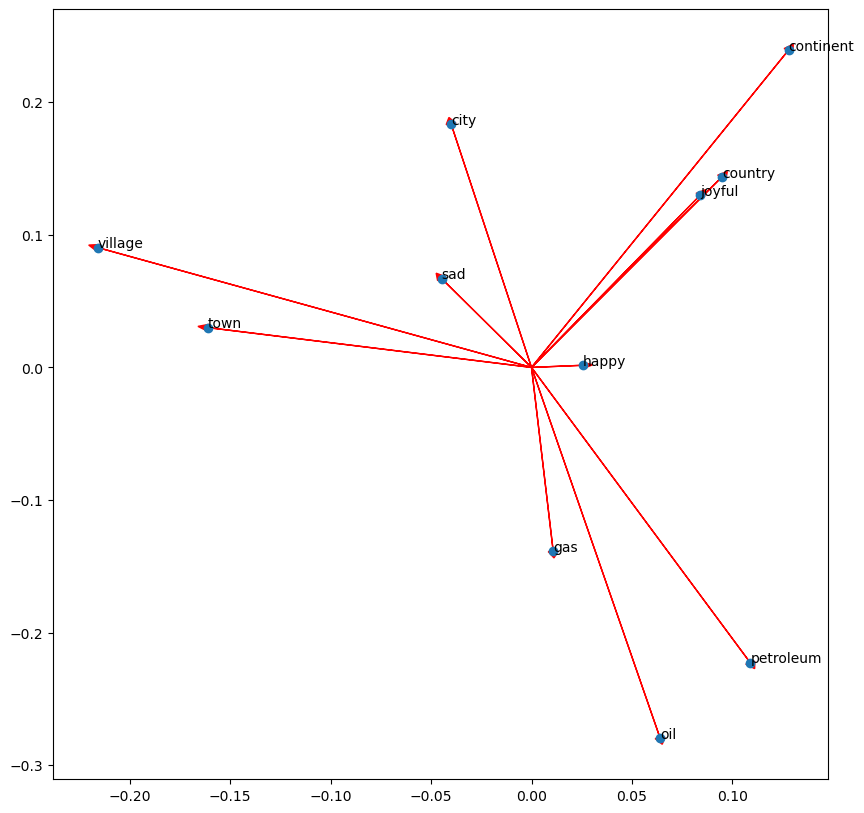

In [40]:
#word embeddings
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 3 # Select the column for the x axis
col2 = 2 # Select the column for the y axis

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))


plt.show()

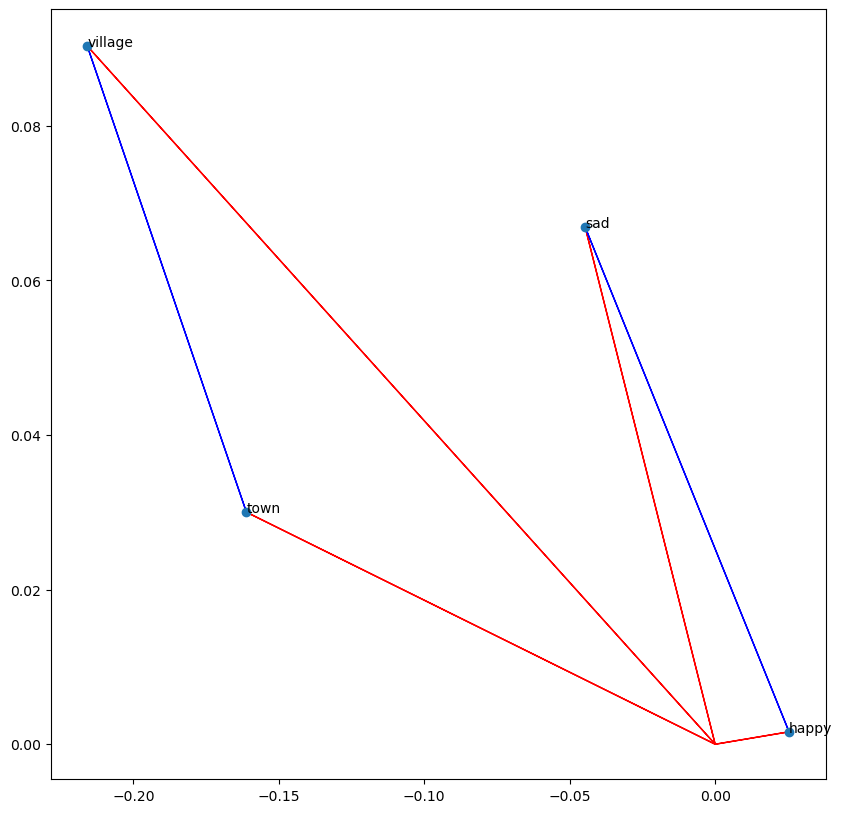

In [44]:
#Word distance
words = ['sad', 'happy', 'town', 'village']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 3 # Select the column for the x axe
col2 = 2 # Select the column for the y axe

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.0005, head_length=0.0005, fc='r', ec='r', width = 1e-5)
    
# print the vector difference between village and town
village = vec('village')
town = vec('town')
diff = town - village
ax.arrow(village[col1], village[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)

# print the vector difference between village and town
sad = vec('sad')
happy = vec('happy')
diff = happy - sad
ax.arrow(sad[col1], sad[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)


ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))

plt.show()

In [45]:
#Linear algebra on word embeddings
print(np.linalg.norm(vec('town'))) # Print the norm of the word town
print(np.linalg.norm(vec('sad'))) # Print the norm of the word sad

2.3858097
2.9004838


In [46]:
#Predicting capitals
capital = vec('France') - vec('Paris')
country = vec('Madrid') + capital

#move from the city of Madrid in the direction of the concept of Capital, 
#and obtain something close to the corresponding country to which Madrid is the Capital.

print(country[0:5]) # Print the first 5 values of the vector

[-0.02905273 -0.2475586   0.53952026  0.20581055 -0.14862823]


In [48]:
diff = country - vec('Spain')
print(diff[0:10])
#not exactly same

[-0.06054688 -0.06494141  0.37643433  0.08129883 -0.13007355 -0.00952148
 -0.03417969 -0.00708008  0.09790039 -0.01867676]


In [50]:
# Create a dataframe out of the dictionary embedding. This facilitate the algebraic operations
keys = word_embeddings.keys()
data = []
for key in keys:
    data.append(word_embeddings[key])

embedding = pd.DataFrame(data=data, index=keys)

# Define a function to find the closest word to a vector:
def find_closest_word(v, k = 1):
    # Calculate the vector difference from each word to the input vector
    diff = embedding.values - v 
    # Get the squared L2 norm of each difference vector.
    # It means the squared euclidean distance from each word to the input vector
    delta = np.sum(diff * diff, axis=1)
    # Find the index of the minimun distance in the array
    i = np.argmin(delta)
    # Return the row name for this item
    return embedding.iloc[i].name

In [58]:
embedding.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
country,-0.080078,0.133789,0.143555,0.094727,-0.047363,-0.023560,-0.008545,-0.186523,0.045898,-0.081543,...,-0.145508,0.067383,-0.244141,-0.077148,0.047607,-0.075195,-0.149414,-0.044189,0.097168,0.067383
city,-0.010071,0.057373,0.183594,-0.040039,-0.029785,-0.079102,0.071777,0.013306,-0.143555,0.011292,...,0.024292,-0.168945,-0.062988,0.117188,-0.020508,0.030273,-0.247070,-0.122559,0.076172,-0.234375
China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,0.034424,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,0.200195,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
oil,-0.139648,0.062256,-0.279297,0.063965,0.044434,-0.154297,-0.184570,-0.498047,0.047363,0.110840,...,-0.195312,-0.345703,0.217773,-0.091797,0.051025,0.061279,0.194336,0.204102,0.235352,-0.051025
town,0.123535,0.159180,0.030029,-0.161133,0.015625,0.111816,0.039795,-0.196289,-0.039307,0.067871,...,-0.007935,-0.091797,-0.265625,0.029297,0.089844,-0.049805,-0.202148,-0.079590,0.068848,-0.164062
Canada,-0.136719,-0.154297,0.269531,0.273438,0.086914,-0.076172,-0.018677,0.006256,0.077637,-0.211914,...,0.105469,0.030762,-0.039307,0.183594,-0.117676,0.191406,0.074219,0.020996,0.285156,-0.257812
London,-0.267578,0.092773,-0.238281,0.115234,-0.006836,0.221680,-0.251953,-0.055420,0.020020,0.149414,...,-0.008667,-0.008484,-0.053223,0.197266,-0.296875,0.064453,0.091797,0.058350,0.022583,-0.101074
England,-0.198242,0.115234,0.062500,-0.058350,0.226562,0.045898,-0.062256,-0.202148,0.080566,0.021606,...,0.135742,0.109375,-0.121582,0.008545,-0.171875,0.086914,0.070312,0.003281,0.069336,0.056152
Australia,0.048828,-0.194336,-0.041504,0.084473,-0.114258,-0.208008,-0.164062,-0.269531,0.079102,0.275391,...,0.021118,0.171875,0.042236,0.221680,-0.239258,-0.106934,0.030884,0.006622,0.051270,-0.135742


In [52]:
find_closest_word(country)

'Spain'

In [59]:
#Predicting other Countries
find_closest_word(vec('Italy') - vec('Rome') + vec('Madrid'))

'Spain'

In [61]:
print(find_closest_word(vec('Berlin') + capital))
print(find_closest_word(vec('Beijing') + capital))

Germany
China


In [60]:
print(find_closest_word(vec('Lisbon') + capital))#not always work

Lisbon


In [63]:
doc = "Spain petroleum city king"
vdoc = [vec(x) for x in doc.split(" ")]
doc2vec = np.sum(vdoc, axis = 0)
find_closest_word(doc2vec)

'petroleum'

In [ ]:
#Another explanation about PCA

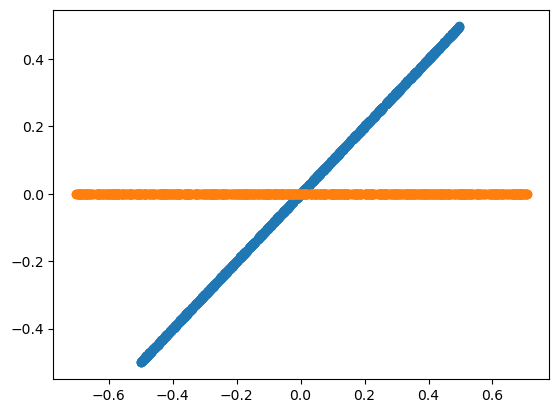

In [65]:
np.random.seed(1)
n = 1  # The amount of the correlation
x = np.random.uniform(1,2,1000) # Generate 1000 samples from a uniform random variable
y = x.copy() * n # Make y = n * x

# PCA works better if the data is centered
x = x - np.mean(x) # Center x. Remove its mean
y = y - np.mean(y) # Center y. Remove its mean

data = pd.DataFrame({'x': x, 'y': y}) # Create a data frame with x and y
plt.scatter(data.x, data.y) # Plot the original correlated data in blue

pca = PCA(n_components=2) # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally, it gets the rotation 
# matrix and the explained variance
pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data) # Transform the data base on the rotation matrix of pcaTr

# # Create a data frame with the new variables. We call these new variables PC1 and PC2
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2']) 

# Plot the transformed data in orange
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

In [71]:
dataPCA.head(10)

,PC1,PC2
0,0.118204,1.812884e-18
1,-0.310731,1.190907e-17
2,0.707800,-2.039469e-17
3,0.280399,-1.132046e-17
4,0.500418,1.323530e-17
5,0.577375,1.312209e-17
6,0.444550,5.640476e-19
7,0.219265,-4.687675e-18
8,0.146848,-4.995834e-18
9,-0.054040,-8.604416e-19


In [72]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues or explained variance
[1.66465230e-01 2.08930963e-34]


angle:  45.0
rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


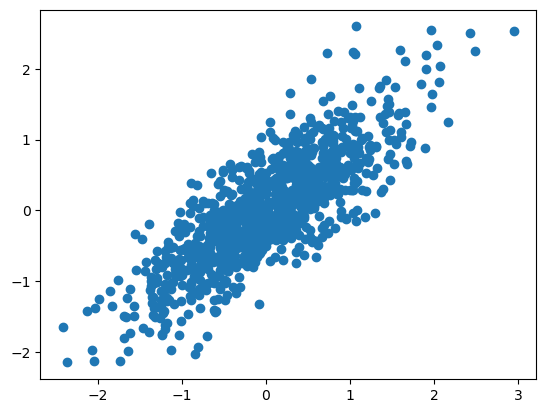

In [74]:
# controlled dataset composed of 2 random variables with different variances and with a specific Covariance among them
np.random.seed(100)

std1 = 1     # The desired standard deviation of our first random variable
std2 = 0.333 # The desired standard deviation of our second random variable

x = np.random.normal(0, std1, 1000) # Get 1000 samples from x ~ N(0, std1)
y = np.random.normal(0, std2, 1000)  # Get 1000 samples from y ~ N(0, std2)
#y = y + np.random.normal(0,1,1000)*noiseLevel * np.sin(0.78)

# PCA works better if the data is centered
x = x - np.mean(x) # Center x 
y = y - np.mean(y) # Center y

#Define a pair of dependent variables with a desired amount of covariance
n = 1 # Magnitude of covariance. 
angle = np.arctan(1 / n) # Convert the covariance to and angle
print('angle: ',  angle * 180 / math.pi)

# Create a rotation matrix using the given angle
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
                 [-np.sin(angle), np.cos(angle)]])


print('rotationMatrix')
print(rotationMatrix)

xy = np.concatenate(([x] , [y]), axis=0).T # Create a matrix with columns x and y

# Transform the data using the rotation matrix. It correlates the two variables
data = np.dot(xy, rotationMatrix) # Return a nD array

# Print the rotated data
plt.scatter(data[:,0], data[:,1])
plt.show()

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.70827652  0.7059351 ]
 [-0.7059351   0.70827652]]

Eigenvalues or explained variance
[1.09488457 0.11243237]


/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_20016/1540591202.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_20016/1540591202.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')


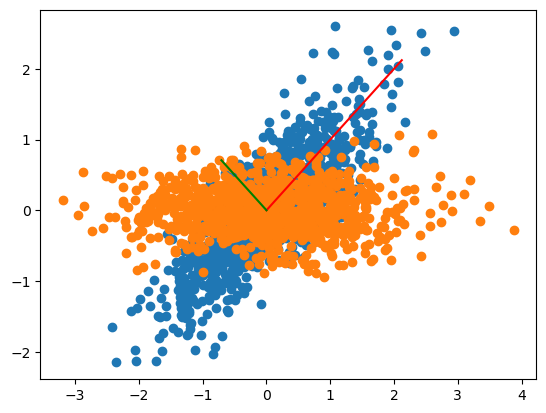

In [75]:
plt.scatter(data[:,0], data[:,1]) # Print the original data in blue

# Apply PCA. In theory, the Eigenvector matrix must be the 
# inverse of the original rotationMatrix. 
pca = PCA(n_components=2)  # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally it gets the rotation 
# matrix and the explained variance
pcaTr = pca.fit(data)

# Create an array with the transformed data
dataPCA = pcaTr.transform(data)

print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

# Print the rotated data
plt.scatter(dataPCA[:,0], dataPCA[:,1])

# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')

plt.show()
# explained Variance is approximately [1,0.333∗0.333]=[𝑠𝑡𝑑12,𝑠𝑡𝑑22] the parameters of our original random variables x and y